In [1]:
import hyperspy.api as hs
from spectrum_image import SI
from spectrum_image import SI_util
import numpy as np
from tifffile import imwrite

%matplotlib widget

In [2]:
## File and microscope parameters
path = "path/to/data"
SIdm = "STEM SI.dm4"

In [3]:
SI_file=hs.load(path+SIdm)
print(SI_file)
hs_survey = SI_file[0]
hs_ADF = SI_file[1]
hs_LL = SI_file[2]
hs_HL = SI_file[3]

WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)
WARNING | Hyperspy | `signal_type='EELS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all h

In [4]:
rawE, rawSI, pxscale, disp, params = SI_util.get_hyperspy_data( hs_HL )

si = rawSI
es = rawE
adf = hs_ADF.data

<Axes manager, axes: (58, 63|2048)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |     58 |      0 |      -0 |    0.07 |     nm 
               y |     63 |      0 |      -0 |    0.07 |     nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
     Energy loss |   2048 |      0 | 7.2e+02 |    0.15 |     eV 


In [5]:
# Pre-process SI as necessary

## CROP SI
# si = si[0:90,:,:]
# ADF = hs_ADF.data[0:90,:]

## Replace outliers far from median ( value > median+multiplier*std ) with median
# si = SI_util.remove_outlier( si, threshold_multiplier=1 )

## Shear SI and ADF by some angle
# si_shear,adf_shear = SI_util.shear_x_SI( si, adf, 50 )

In [6]:
# Create SI instance
p = SI.SI( si, adf, es )

## Bin SI along energy axis
# p.bin_energy_x2()
## Bin SI along spatial axis
# p.bin_xy_x2()
# p.bin_x_x2()
# p.bin_y_x2()

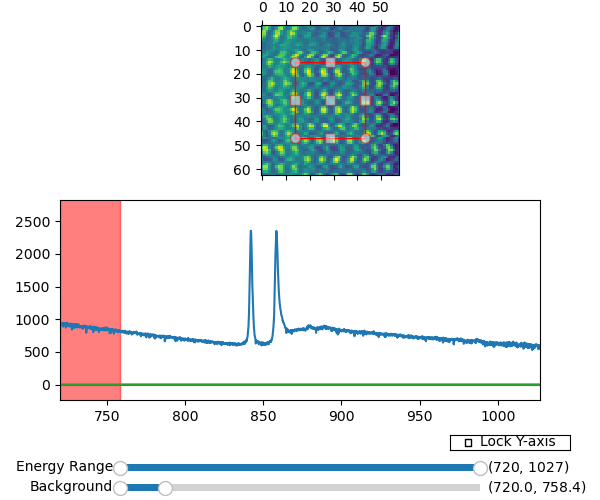

In [7]:
# SI viewer with background subtraction
# bg_type: 'powerlaw', 'LCPL', None
# LCPL doesn't work too well at the moment
p.SI_viewer( bg_type='powerlaw')

In [8]:
# Run Background subtraction from energy window chosen in GUI
# Alternatively you may specify bsub range
# e.g SI_bgsub, e_bsub = p.bgsub_SI_lba(  e_bsub=[500, 530], bg_type="powerlaw")

SI_bgsub, e_bsub = p.bgsub_SI( bg_type="powerlaw")

# You can perform local background averaging if desired
# SI_bgsub_lba, e_bsub = p.bgsub_SI_lba( bg_type="powerlaw", gfwhm=5)
# e.g SI_bgsub_lba, e_bsub = p.bgsub_SI_lba(  e_bsub=[500, 530], bg_type="powerlaw")


Background subtracting:   0%|          | 0/3654 [00:00<?, ?it/s]

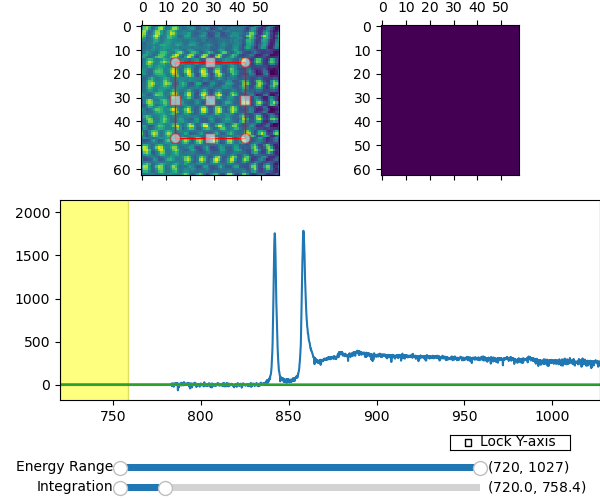

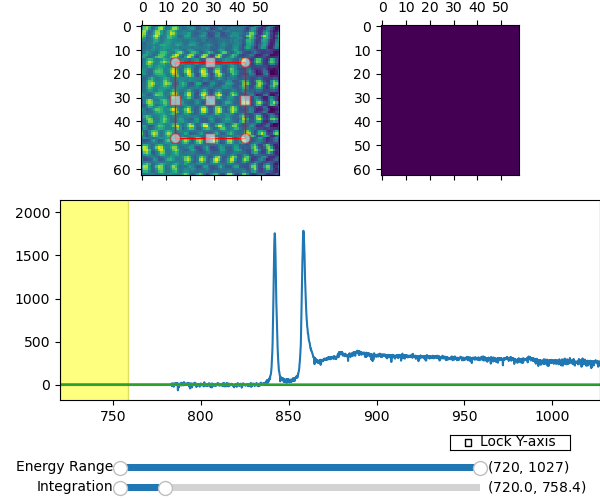

In [9]:
# New SI instance with background subtracted SI

p_bsub = SI.SI( SI_bgsub, p.ADF, p.es )
p_bsub.SI_integrator( )

# SI viewer with energy integration
p_bsub.SI_integrator( )

In [10]:
# Run Background subtraction from energy window chosen in GUI
# Alternatively you may specify bsub range
# e.g im_int = p_bsub.integrate_SI(  e_int=[550, 580] )

im_int, e_int = p_bsub.integrate_SI()
fname = "bsub_({:.3f}-{:.3f})_int_({:.3f}-{:.3f}).tif".format( *e_bsub, *e_int )
imwrite( path+fname, im_int)
print(fname)

bsub_(783.116-835.997)_int_(836.850-888.025).tif
